In [1]:
import os

In [2]:
from nilearn.plotting import plot_stat_map

In [3]:
import matplotlib.pyplot as plt

In [4]:
from nilearn.image import new_img_like, load_img, math_img, get_data

In [5]:
import numpy as np

In [ ]:
# os.chdir('/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1/cluster_scripts')
# os.chdir('/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1')

In [33]:
def plot_level2_stat_maps(reg, task, mnum, sessions, data_path, bg_img,
                         cut_coords = [8], threshold = 1.96, display_mode = 'y',
                         black_bg = False, vmax = 6, fig_w = 12, fig_h = 3,
                         space = 'MNI152NLin2009cAsym_res-2', filter_tfce = False):

    fig, a = plt.subplots(1, len(sessions), figsize=(fig_w, fig_h))

    cols = sessions

    for ax, col in zip(a, cols):
            ax.set_title(col)

    corrected = 'unc'
    if filter_tfce:
        corrected = 'cor'

    fig.suptitle('%s-%s-thr-%s-%s'%(task, reg, str(threshold), corrected), y=1.05)

    for i, cur_ses in enumerate(sessions):

        unc_tmap_fn = os.path.join(data_path, reg + '_' + mnum, cur_ses, '%s_%s_%s_unc_tmap.nii.gz'%(reg, mnum, cur_ses))
        cur_img = unc_tmap_fn

        if(filter_tfce):
            cur_img = filter_tmap_tfce(unc_tmap_fn)

        plot_stat_map(cur_img,
                      bg_img = bg_img,
                      cut_coords = cut_coords,
                      threshold = threshold,
                      draw_cross=False,
                      display_mode = display_mode,
                      black_bg = black_bg,
                      axes = a[i],
                      vmax = vmax)


In [42]:

base_path = '/Users/zeynepenkavi/CpuEaters/overtrained_decisions_bidsfmri'

data_path = os.path.join(base_path, 'derivatives/nilearn/glm/level2/yesNo/model2/overall-mean')

task = 'yesNo'
mnum = 'model2'
reg = 'valHT_par'

sessions_dict = {'session-ind': ['ses-01', 'ses-02', 'ses-03'],
                 'session-diff': ['ses-02_min_ses-01', 'ses-03_min_ses-01', 'ses-03_min_ses-02']}

cuts_list = {'disp_mode': 'y', 'cut': 8}, {'disp_mode': 'x', 'cut': -6}, {'disp_mode': 'x', 'cut': 4}


anat_path = os.path.join(base_path, 'derivatives/sub-601/anat')
bg_img_fn = 'sub-601_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz'
bg_img = os.path.join(anat_path, bg_img_fn)

fig_path = '/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/02_level2/figs'
out_path = os.path.join(fig_path, task, mnum)
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [51]:
regs = ['stimRE_ev', 'stimHT_ev', 'valRE_par', 'valHT_par']

for reg in regs:
    
    for session_type, sessions in sessions_dict.items():

        for cut_coords in cuts_list:

            plot_level2_stat_maps(reg, task, mnum, sessions, data_path, bg_img, display_mode = cut_coords['disp_mode'], cut_coords = [cut_coords['cut']])

            fig_fn = task + '_' + mnum + '_' + reg + '_group-mean_' + session_type + '_' + cut_coords['disp_mode'] + '_' + str(cut_coords['cut']) + '.jpeg'
            plt.savefig(os.path.join(out_path, fig_fn), transparent=False, pad_inches = 0.05, bbox_inches = 'tight')

In [55]:
def filter_tmap_tfce(unc_tmap_fn, logp_threshold = 1):
        
    img_path = os.path.dirname(unc_tmap_fn)
    
    imgs = os.listdir(img_path)
    
    tfce_imgs = [i for i in imgs if 'logp_max_tfce' in i]
    
    if len(tfce_imgs) != 2:
        print("***********************************************")
        print("Did not find 2 tfce log_p images")
        print("***********************************************")
    else:
        tval_data = get_data(unc_tmap_fn)
        neg_pval_data = get_data(os.path.join(img_path, tfce_imgs[0]))
        pos_pval_data = get_data(os.path.join(img_path, tfce_imgs[1]))

        filt_tval_data = np.where((pos_pval_data > logp_threshold) | (neg_pval_data > logp_threshold), tval_data, 0)
        
        cor_tmap = new_img_like(unc_tmap_fn, filt_tval_data)
        
        return cor_tmap

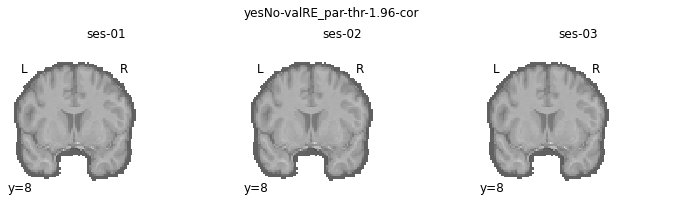

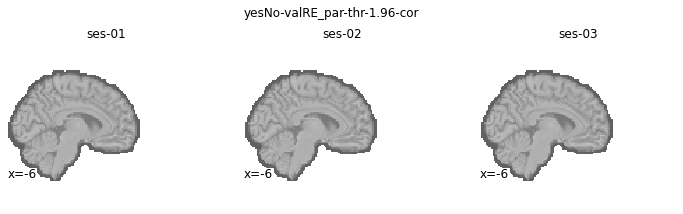

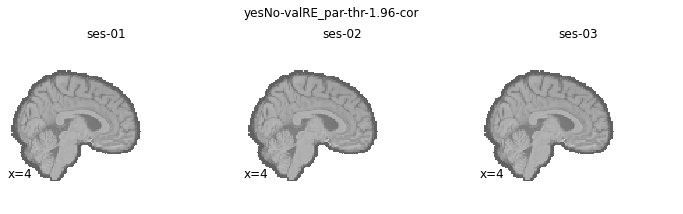

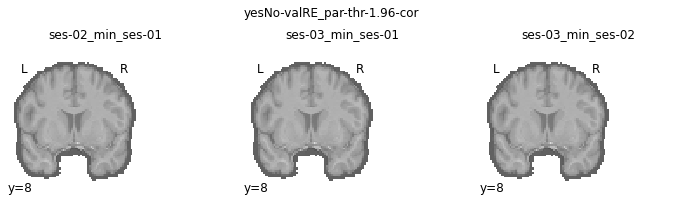

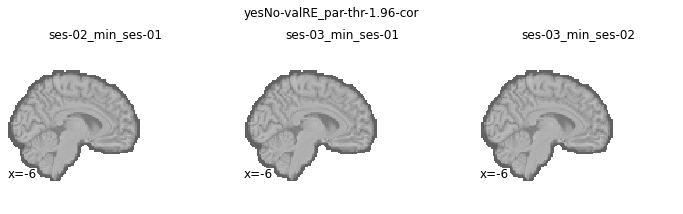

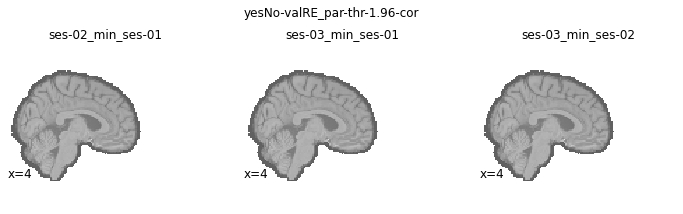

In [57]:
reg = 'valRE_par'

for session_type, sessions in sessions_dict.items():
    
    for cut_coords in cuts_list:
        
        plot_level2_stat_maps(reg, task, mnum, sessions, data_path, bg_img, display_mode = cut_coords['disp_mode'], cut_coords = [cut_coords['cut']], filter_tfce=True)
                      
        fig_fn = task + '_' + mnum + '_' + reg + '_group-mean_' + session_type + '_tfce_' +cut_coords['disp_mode'] + '_' + str(cut_coords['cut']) + '.jpeg'
        plt.savefig(os.path.join(out_path, fig_fn), transparent=False, pad_inches = 0.05, bbox_inches = 'tight')